# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt



# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def eta_b(mu_plus,mu_min,p_plus,cov_plus,cov_min,X_test):
    '''Computes the bayes classifier score for a datapoint.
    
    Arguments :
    mu_plus : ML estimate for the mean for the +1 class. Shape = (d,)
    mu_min : ML estimate for the mean for the -1 class. Shape = (d,)
    p_plus : ML estimate for class prior.
    cov_plus  : Covariance for +1 class
    cov_min  : Covariance for -1 class    
    X_test : numpy array of shape (m,d)
    
    Returns :
    eta(X_test) : shape (m,2)
    '''
    
    cov_plus_inv = np.linalg.inv(cov_plus)
    cov_min_inv = np.linalg.inv(cov_min)
    div_plus = (X_test-np.reshape(mu_plus,(1,-1)))
    quad_plus = (div_plus@cov_plus_inv*div_plus).sum(axis=1)
    div_min = (X_test-np.reshape(mu_min,(1,-1)))
    quad_min = (div_min@cov_min_inv*div_min).sum(axis=1)
    det_plus = np.linalg.det(cov_plus)**0.5
    det_min = np.linalg.det(cov_min)**0.5
    b = np.log((1-p_plus)/p_plus)
    return 1/(1+ (det_plus/det_min)*np.exp(b+0.5*quad_plus-0.5*quad_min))


def eta_a(mu_plus,mu_min,p_plus,X_test):
    '''Computes the Naive bayes classifier score for a datapoint
    
    Arguments :
    mu_plus : ML estimate for the mean for the +1 class. Shape = (d,)
    mu_min : ML estimate for the mean for the -1 class. Shape = (d,)
    p_plus : ML estimate for class prior.
    X_test : numpy array of shape (m,d)
    
    Returns :
    eta = 1/(1 + exp(w@X_test+b)). Shape = (m,)
    '''
    
    w = mu_min - mu_plus
    b = 0.5*(np.linalg.norm(mu_plus)**2-np.linalg.norm(mu_min)**2)
    b += np.log((1-p_plus)/p_plus)
    return 1/(1 + np.exp(X_test@w+b))

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train==1]
    y_minus = Y_train[Y_train==-1]
    p_plus = len(y_plus)/len(Y_train)
    x_plus = X_train[Y_train==1,:]
    x_min  = X_train[Y_train==-1,:]
    mu_plus = np.mean(x_plus,axis=0)
    mu_min = np.mean(x_min,axis=0)
    eta = eta_a(mu_plus,mu_min,p_plus,X_test)
    preds = np.sign(2*eta-1)
    return preds
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train==1]
    y_minus = Y_train[Y_train==-1]
    p_plus = len(y_plus)/len(Y_train)
    x_plus = X_train[Y_train==1,:]
    x_min  = X_train[Y_train==-1,:]
    mu_plus = np.mean(x_plus,axis=0)
    mu_min = np.mean(x_min,axis=0)
    cov_plus = np.cov(x_plus.T,bias=True)*len(x_plus)
    cov_min = np.cov(x_min.T,bias=True)*len(x_min)
    cov_tot = (cov_plus + cov_min)/len(X_train)
    eta = eta_b(mu_plus,mu_min,p_plus, cov_tot,cov_tot,X_test)
    return np.sign(2*eta-1)
    

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    y_plus = Y_train[Y_train==1]
    y_minus = Y_train[Y_train==-1]
    p_plus = len(y_plus)/len(Y_train)
    x_plus = X_train[Y_train==1,:]
    x_min  = X_train[Y_train==-1,:]
    mu_plus = np.mean(x_plus,axis=0)
    mu_min = np.mean(x_min,axis=0)
    cov_plus = np.cov(x_plus.T,bias=True)
    cov_min = np.cov(x_min.T,bias=True)
    eta = eta_b(mu_plus,mu_min,p_plus, cov_plus,cov_min,X_test)
    return np.sign(2*eta-1)


In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,4)+np.array([[1.,2.,3.,4.]])
X_train_neg = np.random.randn(1000,4)+np.array([[2.,4.,3.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,4)+np.array([[1.,2.,3.,4.]])
X_test_neg = np.random.randn(1000,4)+np.array([[2.,4.,3.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


<Figure size 432x288 with 0 Axes>

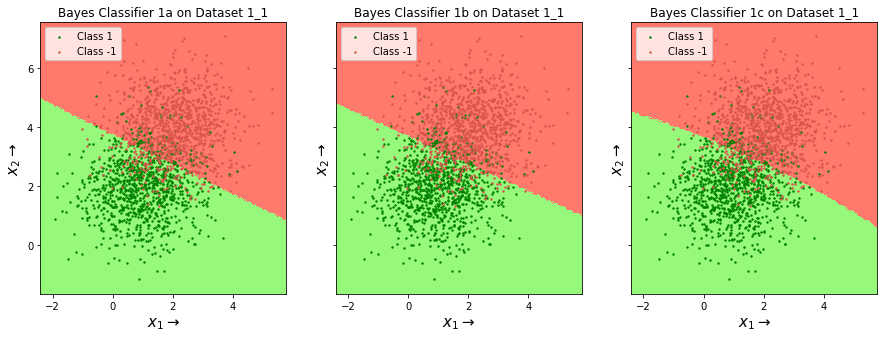

<Figure size 432x288 with 0 Axes>

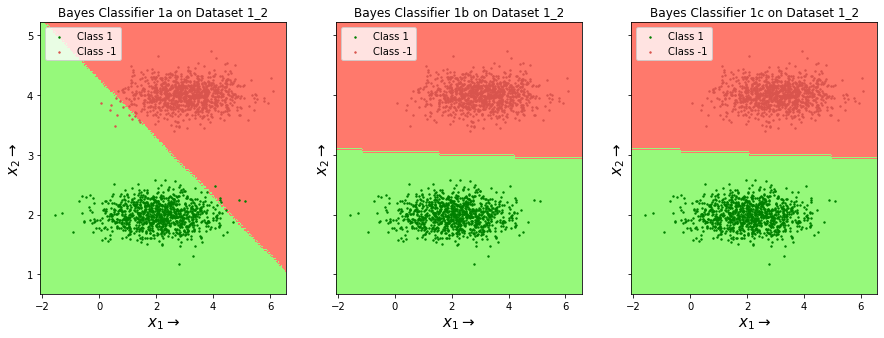

<Figure size 432x288 with 0 Axes>

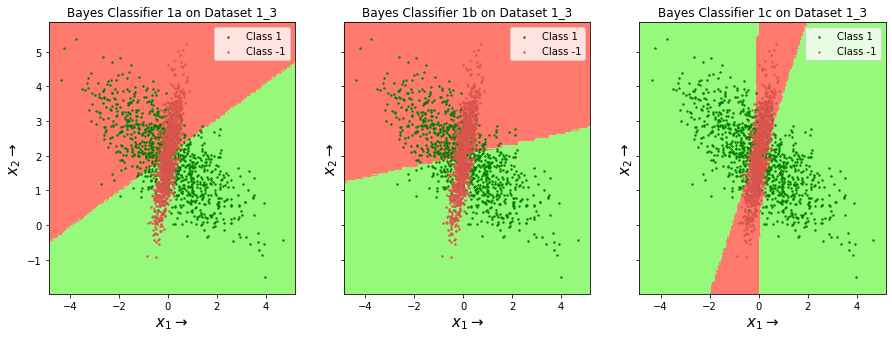

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

data1_1 = np.load('dataset1_1.npz')
X_train, Y_train, X_test, Y_test = data1_1['arr_0'],data1_1['arr_1'],data1_1['arr_2'],data1_1['arr_3']
Y_pred_11a = Bayes1a(X_train,Y_train,X_test)
Y_pred_11b = Bayes1b(X_train,Y_train,X_test)
Y_pred_11c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

### Uncomment the following code block to get the error rates for dataset1_1

# print('Error rates: ',1 - (Y_pred_11a==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1 - (Y_pred_11b==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1 - (Y_pred_11c==Y_test).sum()*1.0/len(Y_test))

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_1')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() 

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label="Class -1")
ax2.set_title('Bayes Classifier 1b on Dataset 1_1')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_1')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data1_2 = np.load('dataset1_2.npz')
X_train, Y_train, X_test, Y_test = data1_2['arr_0'],data1_2['arr_1'],data1_2['arr_2'],data1_2['arr_3']
Y_pred_12a = Bayes1a(X_train,Y_train,X_test)
Y_pred_12b = Bayes1b(X_train,Y_train,X_test)
Y_pred_12c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


### Uncomment the following code block to get the error rates for dataset1_2


# print('Error rates: ',1 - (Y_pred_12a==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1 - (Y_pred_12b==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1 - (Y_pred_12c==Y_test).sum()*1.0/len(Y_test))

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='green',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_2')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()
ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g', label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax2.set_title('Bayes Classifier 1b on Dataset 1_2')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d', label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_2')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()

data1_3 = np.load('dataset1_3.npz')
X_train, Y_train, X_test, Y_test = data1_3['arr_0'],data1_3['arr_1'],data1_3['arr_2'],data1_3['arr_3']
Y_pred_13a = Bayes1a(X_train,Y_train,X_test)
Y_pred_13b = Bayes1b(X_train,Y_train,X_test)
Y_pred_13c = Bayes1c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])


### Uncomment the following code block to get the error rates for dataset1_3

# print('Error rates: ',1 -  (Y_pred_13a==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1 - (Y_pred_13b==Y_test).sum()*1.0/len(Y_test))
# print('Error rates: ',1  -(Y_pred_13c==Y_test).sum()*1.0/len(Y_test))

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes1a(X_train,Y_train,test_samples)
Zb = Bayes1b(X_train,Y_train,test_samples)
Zc = Bayes1c(X_train,Y_train,test_samples)

plt.figure(2)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
C2 = ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax1.set_title('Bayes Classifier 1a on Dataset 1_3')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax2.set_title('Bayes Classifier 1b on Dataset 1_3')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()

ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#96f97b'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='#d9544d',label='Class -1')
ax3.set_title('Bayes Classifier 1c on Dataset 1_3')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend()
plt.show()



## Observations 

- The Bayes1a classifier can handle data for which the features are conditionally independent given the classes. The classifier decision is based on a *linear* function of the features.
- The Bayes1b classifier can handle data for which the class conditonal distributions have a **common** covarince matrix. Thus, given the label, the features are correlated, but the covariance matrix is the same for data from both classes. Here as well, the classifier decision boundary is *linear* in the features.
- The Bayes2c classifier can handle data for which the class conditional distributions can have different covariance matrices. Here, the classifier decision boundary *can* be a non-linear function of the features.
- In dataset1_1, we see that for each cluster, the datapoints are distributed randomly around the mean. Thus, the features appear to be uncorrelated. Thus, we expect similar performance from all three classifiers, as validated in the plots above.
- In dataset1_2, the features are correlated, but the datapoints are linearly separable. Bayes1a classifier decision boundary is **always** perpendicular to the line joining the mean vector of the class conditinal distributions. Bayes1b classifier, which also incorporates the covariance of the features is able to separate the datapoints better. A similar argument holds for Bayes1c.
- In dataset1_3, there is no possible linear boundary that can separate the data, and thus Bayes1a and Bayes2b classifiers fail. This can be clearly seen in the error rates for the two classifiers. Bayes1c can model non-linear decision boundaries and is thus able to separate the datapoints of the two classes.



The error rates (in %) are summarised in the table below :

| Classifier | Dataset 1_1 | Dataset 1_2 | Dataset 1_3 |
| ---------- |:-----------:|:-----------:|:-----------:|
| Bayes 1a |12.6       |0.85|49.7|
| Bayes 1b |12.45      | 0.0|49.5|
| Bayes 1c |12.45|0.0|13.5|





<!-- <table>
<tr><th>Table 1 Heading 1 </th><th>Table 1 Heading 2</th></tr>
<tr><td>

|Table 1| Middle | Table 2|
|--|--|--|
|a| not b|and c|

</td><td>

|b|1|2|3| 
|--|--|--|--|
|a|s|d|f|

</td></tr> </table> -->





# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
# L = np.array([[0,1,1,1],[1,0,1,1],[1,1,0,1],[1,1,1,0]])

def mahalanobis(X_test,mean,cov_inv):
    '''
    Computes the mahalanobis distance for a set of test samples
    
    X_test : test data of shape (m,d)
    cov_inv : Inverse of the covariance matrix , shape (d,d)
    mean : mean vector of size (d,)
    '''
    div = (X_test-mean)
    mn_dist = np.sum(div@cov_inv*div,axis=1) # vectorised form
    return mn_dist


def eta_b_multi(probs,means,cov,X_test):
    '''
    Computer posterior probability vector eta for a test set for Bayes2b
    
    Arguments :
    probs : prior vector of shape (4,)
    means : mean vectors for each class; shape (4,d)
    cov : Common covariance matrix; shape (d,d)
    X_test : Test set of shape (m,d)
    
    Returns:
    eta vector of shape (m,4)
    '''
    cov_inv = np.linalg.inv(cov)
    mn_dist = mahalanobis(X_test,means[0],cov_inv)
    class_cond = np.exp(-0.5*(mn_dist))
    joints = [np.exp(-0.5*mahalanobis(X_test,means[i],cov_inv))*probs[i] for i in range(4)]
    joints = np.array(joints).T 
    denom = np.sum(joints,axis=1)
    eta = np.divide(joints,denom.reshape(-1,1))
    return eta

def eta_c_multi(probs,means,covs,X_test):
    '''
    Computer posterior probability vector eta for a test set for Bayes2c
    
    Arguments :
    probs : prior vector of shape (4,)
    means : mean vectors for each class; shape (4,d)
    covs : list of covariance matrices of shape (d,d)
    X_test : Test set of shape (m,d)
    
    Returns:
    eta vector of shape (m,4)
    '''
    cov_invs = np.asarray([np.linalg.inv(cov) for cov in covs])
    mn_dist = mahalanobis(X_test,means[0],cov_invs[0])
    class_cond = np.exp(-0.5*(mn_dist))
    joints = [np.exp(-0.5*mahalanobis(X_test,means[i],cov_invs[i]))*probs[i]*np.sqrt(np.linalg.det(cov_invs[i]))
                      for i in range(4)]
    joints = np.array(joints).T 
    denom = np.sum(joints,axis=1)
    eta = np.divide(joints,denom.reshape(-1,1))
    return eta

def eta_a_multi(probs,means,X_test):
    '''
    Computer posterior probability vector eta for a test set for Bayes2a
    
    Arguments :
    probs : prior vector of shape (4,)
    means : mean vectors for each class; shape (4,d)
    X_test : Test set of shape (m,d)
    
    Returns:
    eta vector of shape (m,4)
    '''
    div = (X_test-means[0])
    norms = np.linalg.norm(div,axis=1)
    class_cond = np.exp(-0.5*(norms**2))
    joints = [np.exp(-0.5*(np.linalg.norm(X_test-means[i],axis=1)**2))*probs[i] for i in range(4)]
    joints = np.array(joints).T
    denom = np.sum(joints,axis=1)
    eta = np.divide(joints,denom.reshape(-1,1))
    return eta

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    N = len(Y_train)
    probs = np.zeros(4)
    means = np.zeros((4,X_train.shape[1]))
    for i in range(4):
        x = X_train[Y_train==i+1,:]
        y = Y_train[Y_train==i+1]
        probs[i] = len(y)*1.0/N
        means[i] = np.mean(x,axis=0)
    eta = eta_a_multi(probs,means,X_test)        
    eta = eta.reshape(-1,4)
    h = np.argmin(eta@L,axis=1)
    return h+1
    
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    N = len(Y_train)
    probs = np.zeros(4)
    means = np.zeros((4,X_train.shape[1]))
    covs = [0]*4
    for i in range(4):
        x = X_train[Y_train==i+1,:]
        y = Y_train[Y_train==i+1]
        probs[i] = len(y)*1.0/N
        means[i] = np.mean(x,axis=0)
        covs[i] = np.cov(x.T,bias=True)*len(y)
    cov = sum(covs)*1.0/N
    eta = eta_b_multi(probs,means,cov,X_test)
    eta = eta.reshape(-1,4)
    h = np.argmin(eta@L,axis=1)
    return h+1


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    N = len(Y_train)
    probs = np.zeros(4)
    means = np.zeros((4,X_train.shape[1]))
    covs = [0]*4
    for i in range(4):
        x = X_train[Y_train==i+1,:]
        y = Y_train[Y_train==i+1]
        probs[i] = len(y)*1.0/N
        means[i] = np.mean(x,axis=0)
        covs[i] = np.cov(x.T,bias=True)
    eta = eta_c_multi(probs,means,covs,X_test)
    eta = eta.reshape(-1,4)
    h = np.argmin(eta@L,axis=1)
    return h+1

    
def compute_confusion_matrix(Y_true,Y_pred):
    '''
    Computes the confusion matrix for a set of predictions
    
    Arguments:
    Y_true : True labels of shape (m,)
    Y_pred : Predictions of shape (m,)
    
    Returns:
    Confusion matrix of shape (n,n) , where n is the number of labels
    '''
    labels = np.unique(Y_true)
    matrix = np.zeros((len(labels),len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            matrix[i][j]  = ((Y_true==i+1)*(Y_pred==j+1)).sum()
    return matrix

    


In [6]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


<Figure size 432x288 with 0 Axes>

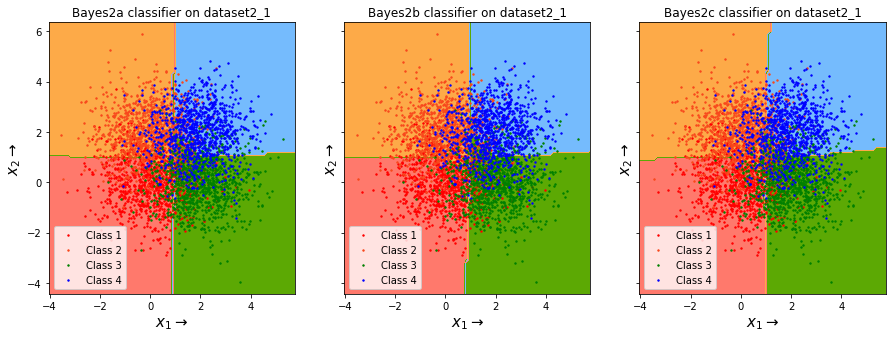

<Figure size 432x288 with 0 Axes>

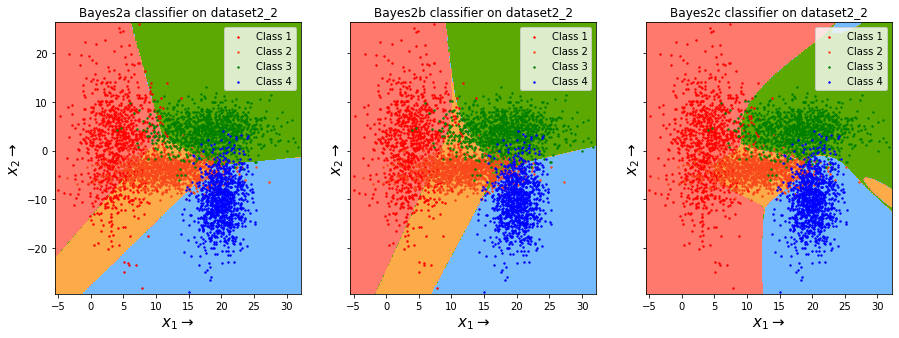

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

data2_1 = np.load('dataset2_1.npz')
X_train, Y_train, X_test, Y_test = data2_1['arr_0'],data2_1['arr_1'],data2_1['arr_2'],data2_1['arr_3']
Y_pred_21a = Bayes2a(X_train,Y_train,X_test)
Y_pred_21b = Bayes2b(X_train,Y_train,X_test)
Y_pred_21c = Bayes2c(X_train,Y_train,X_test)
X_min = np.min(X_train,axis=0)
X_max = np.max(X_train,axis=0)

## Computing the expected loss 

# loss = L[Y_test.astype(int)-1,Y_pred_21a.astype(int)-1]
# loss = np.sum(loss,axis=0)*1.0/len(Y_test)
# print('loss for bayes2a: ',loss)
# loss = L[Y_test.astype(int)-1,Y_pred_21b.astype(int)-1]
# loss = sum(loss)*1.0/len(Y_test)
# print('loss for bayes2b: ',loss)
# loss = L[Y_test.astype(int)-1,Y_pred_21c.astype(int)-1]
# loss = sum(loss)*1.0/len(Y_test)
# print('loss for bayes2c: ',loss)



X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
# print('test samples: ',test_samples.shape)
Za = Bayes2a(X_train,Y_train,test_samples)
Zb = Bayes2b(X_train,Y_train,test_samples)
Zc = Bayes2c(X_train,Y_train,test_samples)


## Uncomment for confusion matrix

# print('Confusion matrix for Bayes2a : \n',compute_confusion_matrix(Y_test,Y_pred_21a))
# print('Confusion matrix for Bayes2b : \n',compute_confusion_matrix(Y_test,Y_pred_21b))
# print('Confusion matrix for Bayes2c : \n',compute_confusion_matrix(Y_test,Y_pred_21c))

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd']) # light red, green, light orange,light blue
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax1.set_title('Bayes2a classifier on dataset2_1')
ax1.legend()
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax2.set_title('Bayes2b classifier on dataset2_1')
ax2.legend()
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax3.set_title('Bayes2c classifier on dataset2_1')
ax3.legend()
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
plt.show()

data2_2 = np.load('dataset2_2.npz')
X_train, Y_train, X_test, Y_test = data2_2['arr_0'],data2_2['arr_1'],data2_2['arr_2'],data2_2['arr_3']
Y_pred_22a = Bayes2a(X_train,Y_train,X_test)
Y_pred_22b = Bayes2b(X_train,Y_train,X_test)
Y_pred_22c = Bayes2c(X_train,Y_train,X_test)
X_min = min(X_train[:,0]),min(X_train[:,1])
X_max = max(X_train[:,0]),max(X_train[:,1])

## Computing the expected loss 

# loss = L[Y_test.astype(int)-1,Y_pred_22a.astype(int)-1]
# print(loss[0])
# loss = np.sum(loss,axis=0)*1.0/len(Y_test)
# print('loss for bayes2a: ',loss)
# loss = L[Y_test.astype(int)-1,Y_pred_22b.astype(int)-1]
# loss = sum(loss)*1.0/len(Y_test)
# print('loss for bayes2b: ',loss)
# loss = L[Y_test.astype(int)-1,Y_pred_22c.astype(int)-1]
# loss = sum(loss)*1.0/len(Y_test)
# print('loss for bayes2c: ',loss)

## Uncomment for confusion matrix

# print('Confusion matrix for Bayes2a : \n',compute_confusion_matrix(Y_test,Y_pred_22a))
# print('Confusion matrix for Bayes2b : \n',compute_confusion_matrix(Y_test,Y_pred_22b))
# print('Confusion matrix for Bayes2c : \n',compute_confusion_matrix(Y_test,Y_pred_22c))

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.1),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.1))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Za = Bayes2a(X_train,Y_train,test_samples)
Zb = Bayes2b(X_train,Y_train,test_samples)
Zc = Bayes2c(X_train,Y_train,test_samples)

plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,Za.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax1.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax1.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax1.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax1.set_title('Bayes2a classifier on dataset2_2')
ax1.legend()
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)

ax2.contourf(X,Y,Zb.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax2.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax2.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax2.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax2.set_title('Bayes2b classifier on dataset2_2')
ax2.legend()
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.contourf(X,Y,Zc.reshape(X.shape),colors=['#ff796c','#5ca904','#fdaa48','#75bbfd'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='r',label='Class 1')
ax3.scatter(X_train[Y_train==2][:,0],X_train[Y_train==2][:,1],s=2,c='#f8481c',label='Class 2')
ax3.scatter(X_train[Y_train==3][:,0],X_train[Y_train==3][:,1],s=2,c='g',label='Class 3')
ax3.scatter(X_train[Y_train==4][:,0],X_train[Y_train==4][:,1],s=2,c='b',label='Class 4')
ax3.set_title('Bayes2c classifier on dataset2_2')
ax3.legend()
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
plt.show()



## Observations
- The *Bayes 2a* classifier can handle data for which the features are independent given the labels. It can only handle data that is linearly separable.
- The *Bayes 2b* classifier can handle data for which the class conditional distributions (multivariate gaussian) have a **common** covariance matrix. 
- The *Bayes 2c* classifier can handle data for which the class conditional distributions can have different covariance matrices. This results in higher flexibility of the model and can be seen in the highly non-linear decision boundaries for *dataset2_2* 
- In case of *dataset2_1*, the features appear to be uncorrelated given the class. Thus, the decision boundaries of all the three models are very similar. *Bayes 2c* achieves the least *expected loss* as expected
- In case of *dataset2_2*, the class conditional distributions have different covariances across different classes. 
    - *Bayes 2a* performs the worst, where the decision boundary between class A and B are dependent only on the direction of the difference between the mean vectors of A and B. 
    - *Bayes 2b* performs on par with *Bayes 2a*, This is because of the inability to handle different correlation between the features for different classes. One can also notice that the *expected loss* is actually *higher* than that of *Bayes 2a*. This is simply because both classifiers are trying to fit the wrong model on the data, and fitting uniform covariance happens to perform worse than ignoring dependencies for *this* data.
    - *Bayes 2c* performs the best, as can be seen from the confusion matrix. 



The expected loss is given by the following table :

<center> Expected Loss for the Bayes classifiers
</center> 

| Dataset | Bayes 2a | Bayes 2b | Bayes 2c |
|---------|:---------:|:--------:|:--------:|
| Dataset2_1| 0.42975 | 0.429 | 0.42775 |
| Dataset2_2 | 0.1835 | 0.1895 | 0.14075|


The Confusion matrices for the three classifiers, evaluated for both the datasets are as follows :


<table>
<tr><th>Matrix for Bayes2a on dataset2_1 </th><th>Matrix for Bayes2b on dataset2_1</th></tr>
<tr><td>



|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|---|---|---|---|---|
|1 |*633* | 219 |136 | 12 |    
| 2| 97 | *738* | 62 | 103|
|3 |86 | 49 | *770* | 95 |
|4 | 15 | 136 | 194 | *655*|

</td><td>


|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|------------|--|---|--|--|
|1 |*633* | 218 |137 | 12 |    
| 2| 95 | *743* | 60 | 102|
|3 |84 | 49 | *773* | 94 |
|4 | 16 | 137 | 196 | *651*|


</td></tr> </table>  

  
<table>
<tr><th>Matrix for Bayes2c on dataset2_1 </th><th> Matrix for Bayes2a on dataset2_2</th></tr>
<tr><td>


|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|--------|--------|-------|----------|-------|
|1 |*634* | 217 |138 | 11 |    
| 2| 99 | *742* | 61 | 98|
|3 |87 | 47 | *772* | 94 |
|4 | 15 | 134 | 201 | *650*|

</td><td>

|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|------------|--|---|--|--|
|1 |830 | 150 |18 | 2 |    
| 2| 93 | 784 | 46 | 77|
|3 |30 | 61 | 905 | 4 |
|4 | 0| 23 | 78 | 899|


</td></tr> </table>  



<table>
<tr><th>Matrix for Bayes2b on dataset2_2 </th><th> Matrix for Bayes2c on dataset2_2</th></tr>
<tr><td>


|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|--------|--------|-------|----------|-------|
|1 |891 | 106 |3 | 0|    
| 2| 119 | 691 | 124 | 66|
|3 |23 | 106 | 864 | 7 |
|4 | 0 | 5 | 102 | 893|

</td><td>

|Target $\downarrow$ /Pred $\rightarrow$ | 1| 2 |3 | 4|
|------------|--|---|--|--|
|1 |901 | 80 |19 | 0 |    
| 2| 64 | 824 | 46 | 66|
|3 |19 | 31 | 936 | 14 |
|4 | 0| 36 | 48 | 916|


</td></tr> </table>

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07


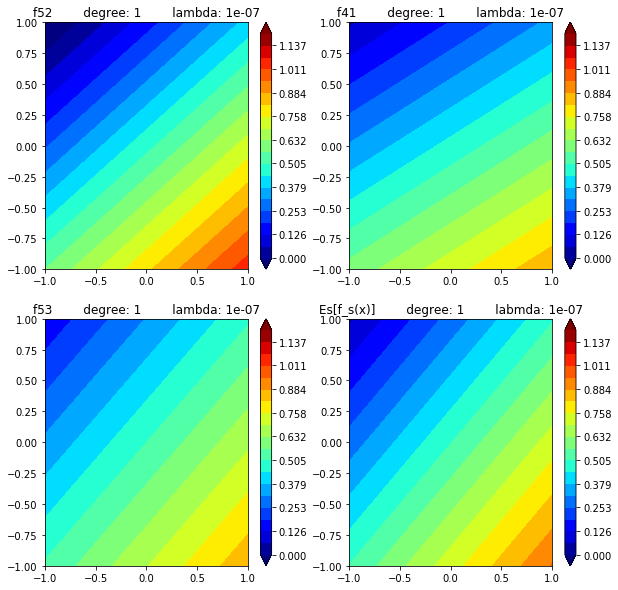

Bias = 0.0551948557660431
Variance = 0.0038865747036765795
MSE = 0.05908143046971966
Degree= 1 lambda= 1e-05


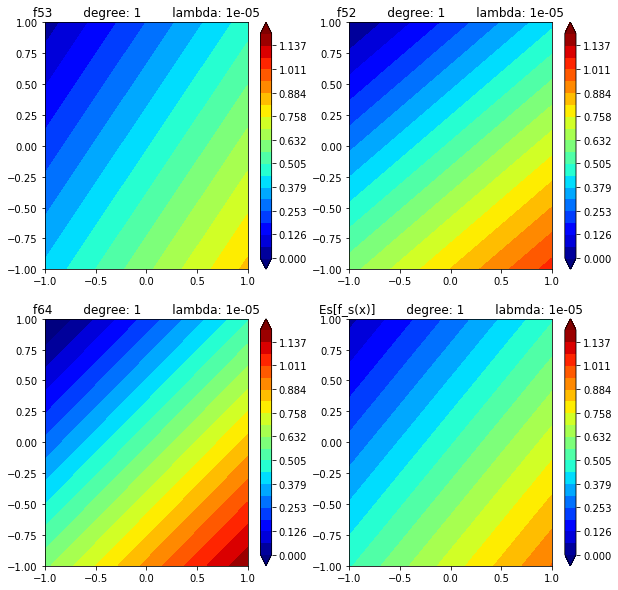

Bias = 0.0551720773666117
Variance = 0.003506536171272175
MSE = 0.058678613537883895
Degree= 1 lambda= 0.001


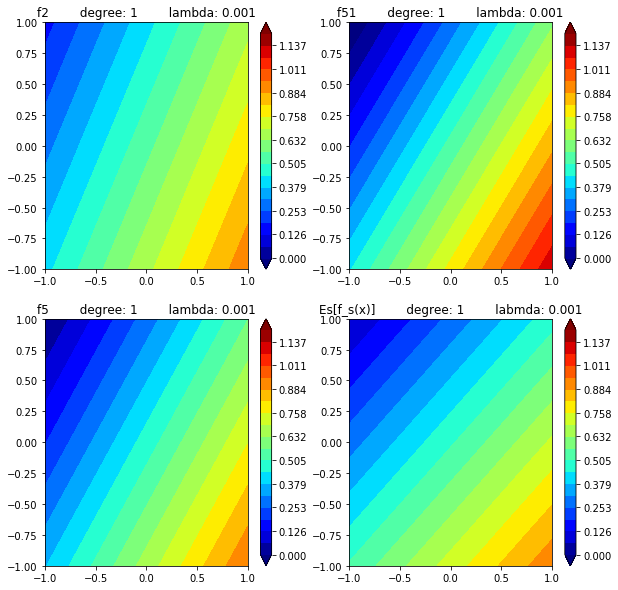

Bias = 0.05513819318423111
Variance = 0.004081688390964006
MSE = 0.05921988157519514
Degree= 1 lambda= 0.1


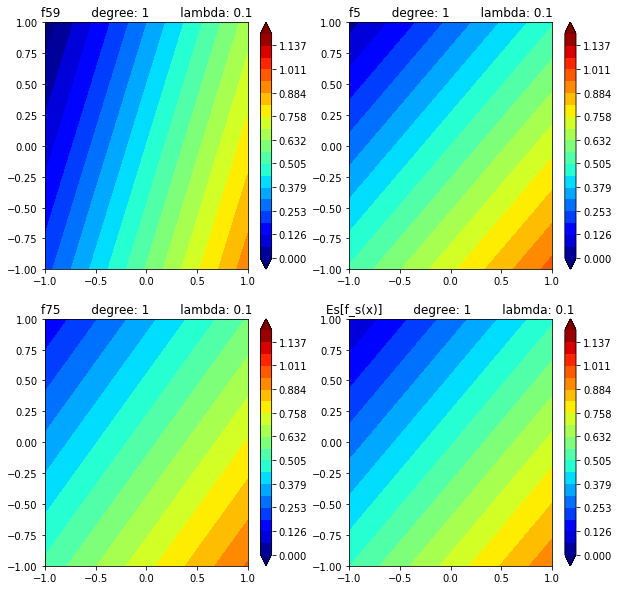

Bias = 0.05510453951737554
Variance = 0.0035416264258093613
MSE = 0.058646165943184905
Degree= 1 lambda= 10.0


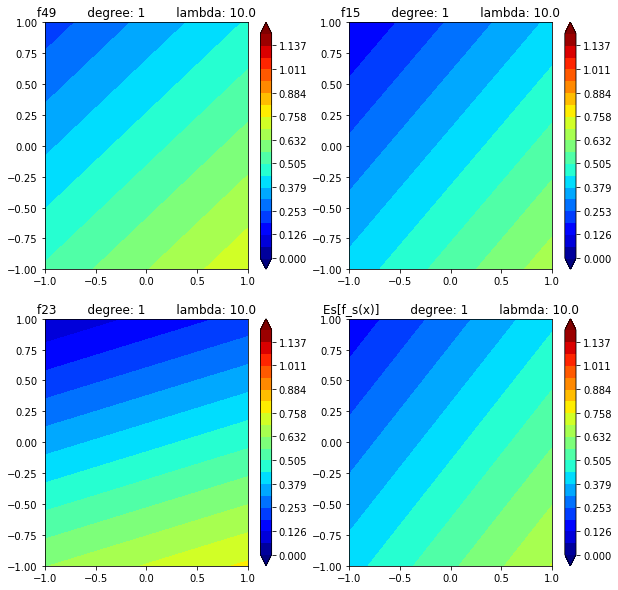

Bias = 0.06458401908430869
Variance = 0.0018991937837348216
MSE = 0.06648321286804353
Degree= 1 lambda= 1000.0


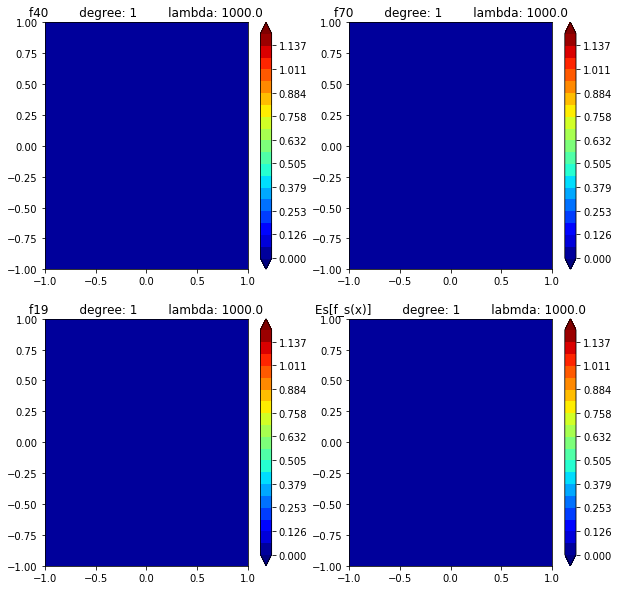

Bias = 0.30721483150612505
Variance = 6.153338505872115e-06
MSE = 0.3072209848446309
Degree= 2 lambda= 1e-07


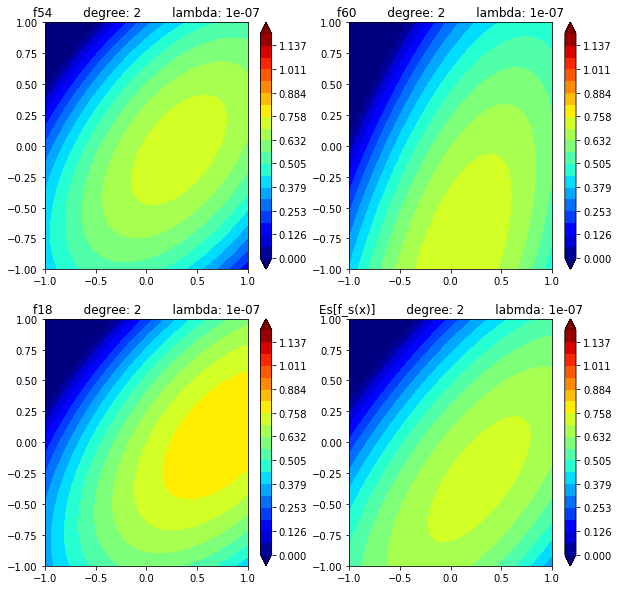

Bias = 0.03480841123287339
Variance = 0.005641887211240944
MSE = 0.04045029844411432
Degree= 2 lambda= 1e-05


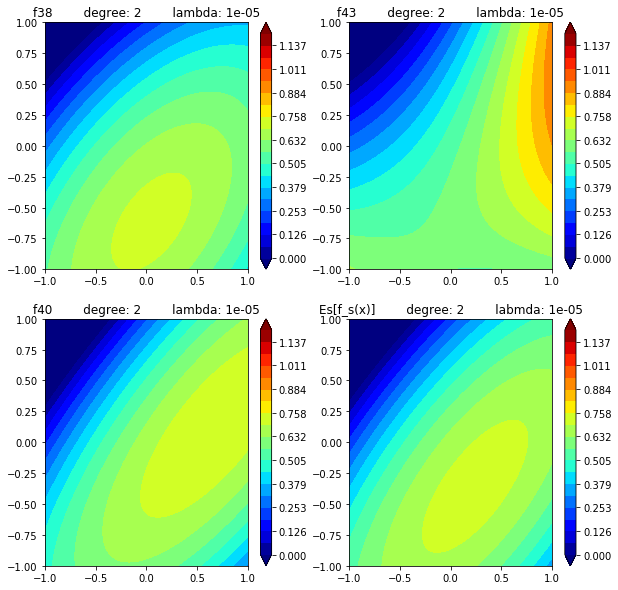

Bias = 0.034910974258080096
Variance = 0.005694882953323651
MSE = 0.04060585721140375
Degree= 2 lambda= 0.001


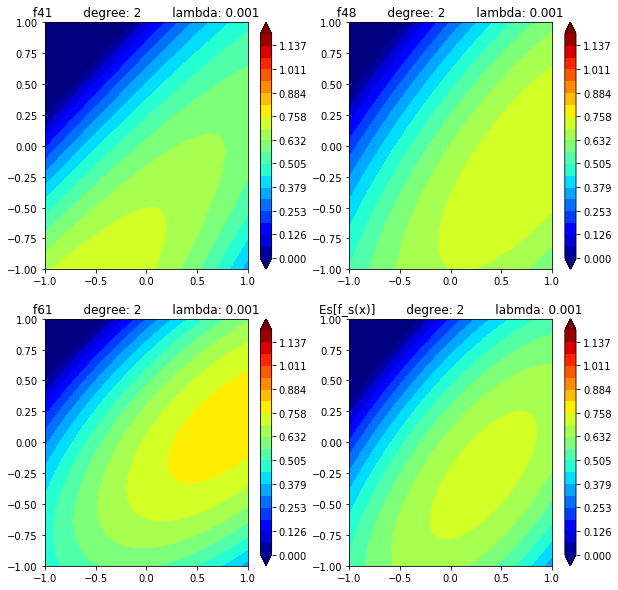

Bias = 0.03486965675892382
Variance = 0.0053738159188139465
MSE = 0.04024347267773774
Degree= 2 lambda= 0.1


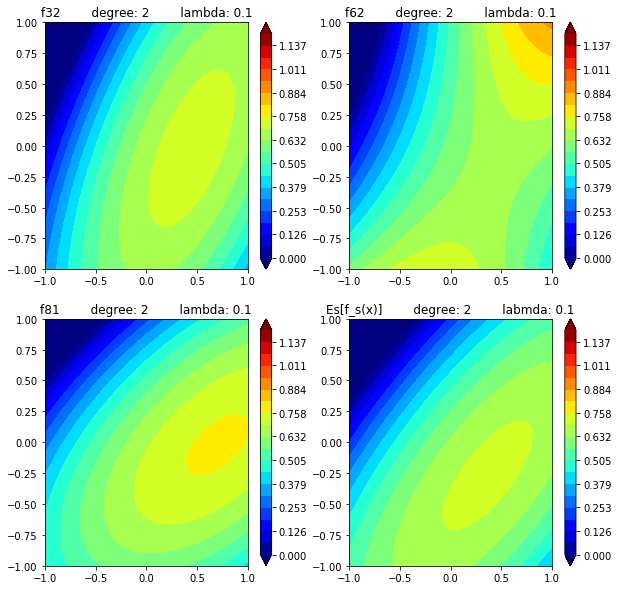

Bias = 0.034962256138215256
Variance = 0.005260873782116346
MSE = 0.04022312992033161
Degree= 2 lambda= 10.0


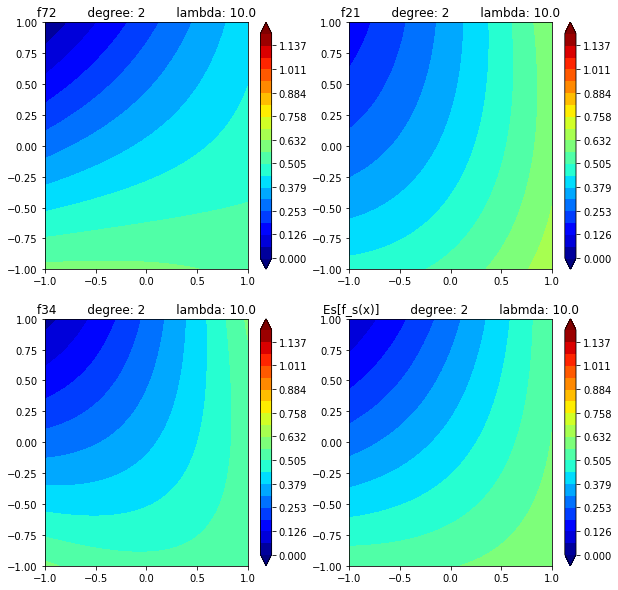

Bias = 0.06132953663182975
Variance = 0.0019416520125876693
MSE = 0.06327118864441744
Degree= 2 lambda= 1000.0


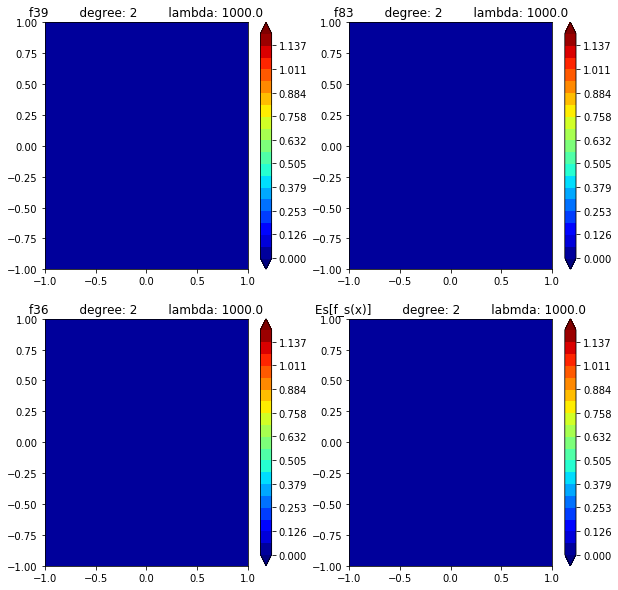

Bias = 0.3034455180791401
Variance = 8.155367005837281e-06
MSE = 0.3034536734461457
Degree= 4 lambda= 1e-07


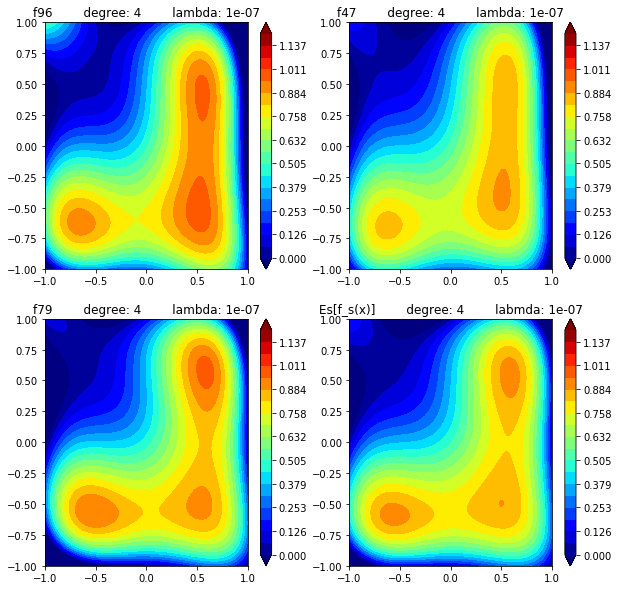

Bias = 0.008448039808561698
Variance = 0.009117191930669913
MSE = 0.017565231739231614
Degree= 4 lambda= 1e-05


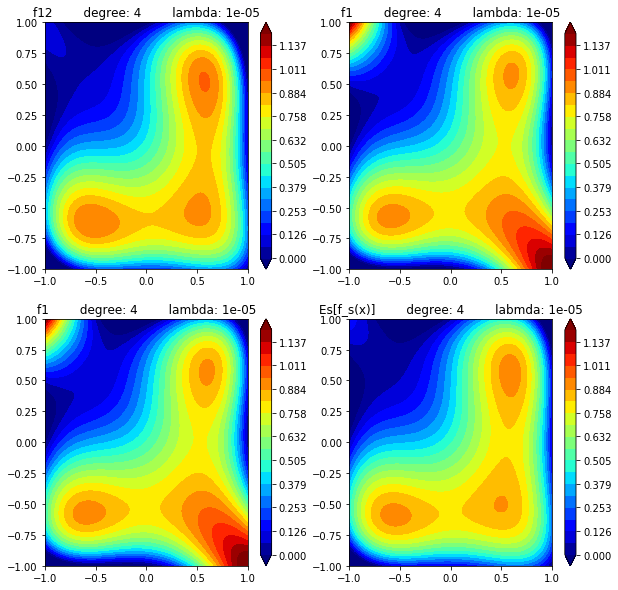

Bias = 0.007952803981271043
Variance = 0.009737014398213614
MSE = 0.01768981837948466
Degree= 4 lambda= 0.001


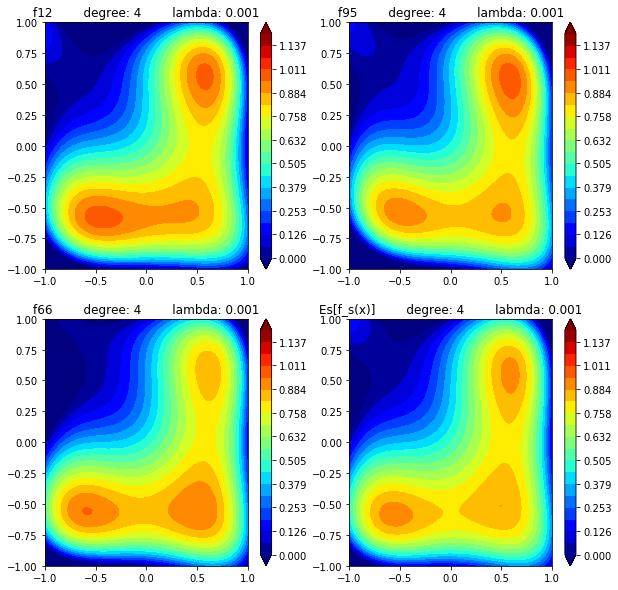

Bias = 0.008213680460513581
Variance = 0.00959468068241125
MSE = 0.017808361142924833
Degree= 4 lambda= 0.1


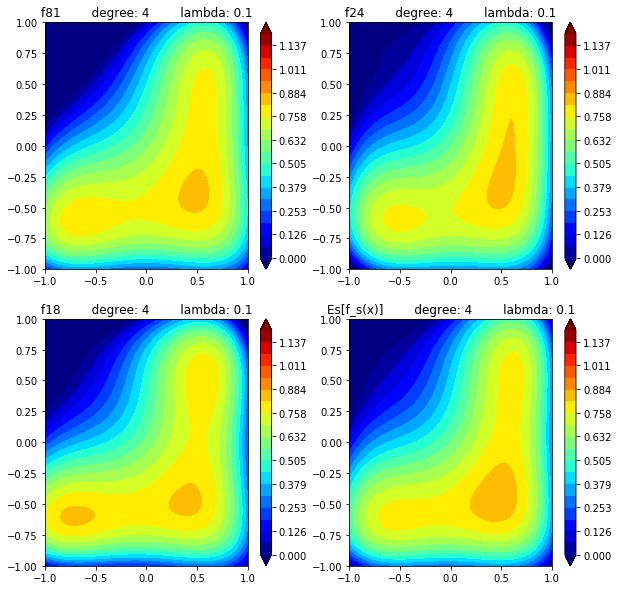

Bias = 0.009164161205765105
Variance = 0.004350233074686907
MSE = 0.013514394280452008
Degree= 4 lambda= 10.0


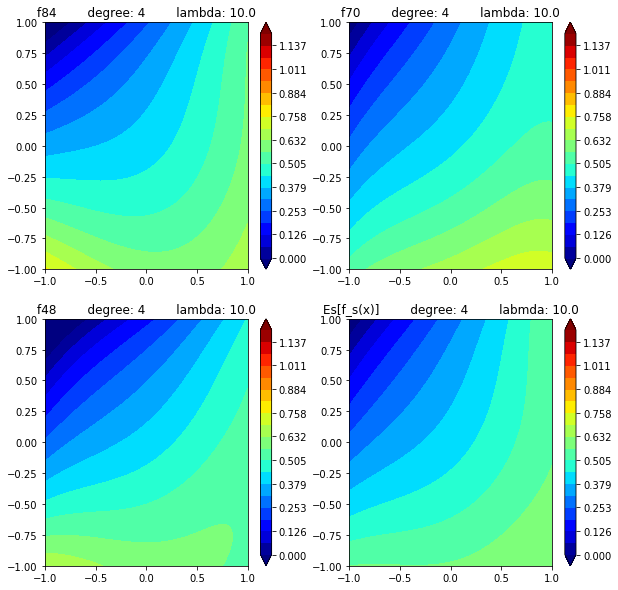

Bias = 0.05937182440367874
Variance = 0.0021316804245268784
MSE = 0.06150350482820564
Degree= 4 lambda= 1000.0


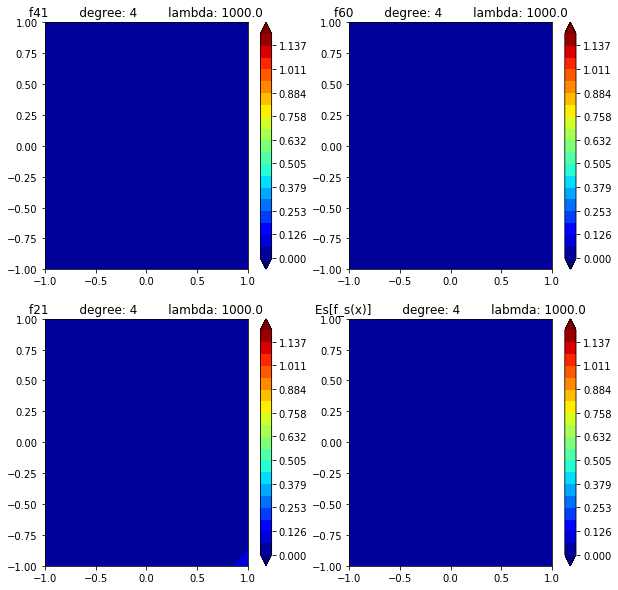

Bias = 0.3022720376260498
Variance = 1.3831643074369712e-05
MSE = 0.3022858692691241
Degree= 8 lambda= 1e-07


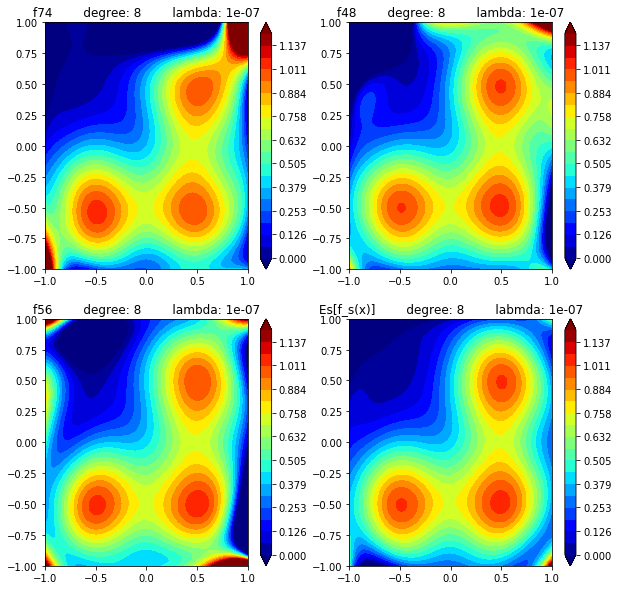

Bias = 0.010521295130656434
Variance = 0.2938405474918088
MSE = 0.3043618426224653
Degree= 8 lambda= 1e-05


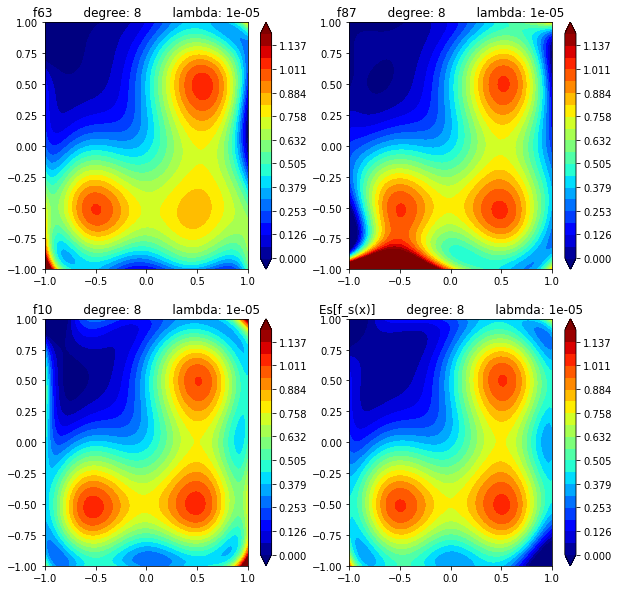

Bias = 0.003968525849310614
Variance = 0.0362452928132062
MSE = 0.04021381866251681
Degree= 8 lambda= 0.001


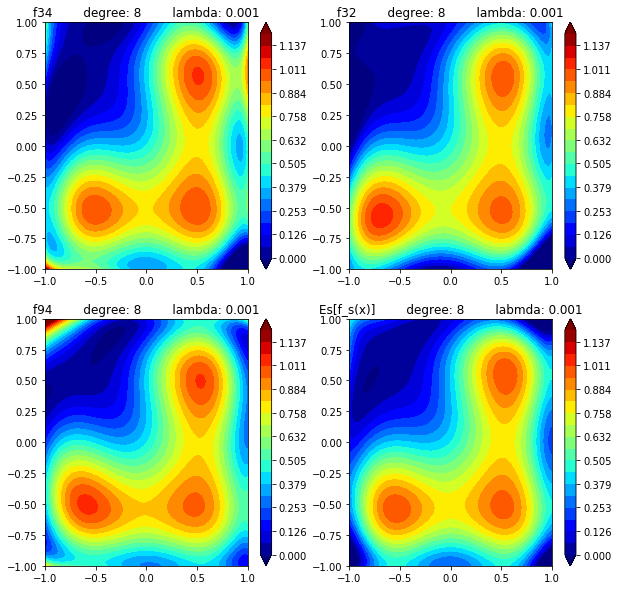

Bias = 0.0046813071689194635
Variance = 0.021427884546056052
MSE = 0.026109191714975527
Degree= 8 lambda= 0.1


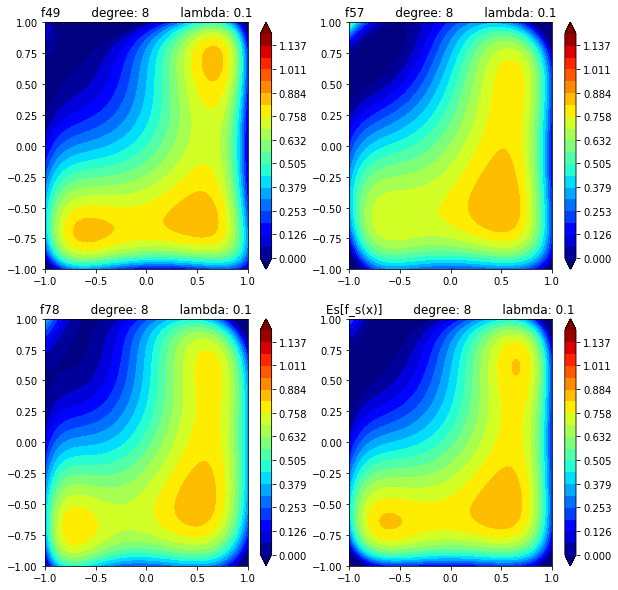

Bias = 0.009967179834924485
Variance = 0.007306218239054789
MSE = 0.017273398073979283
Degree= 8 lambda= 10.0


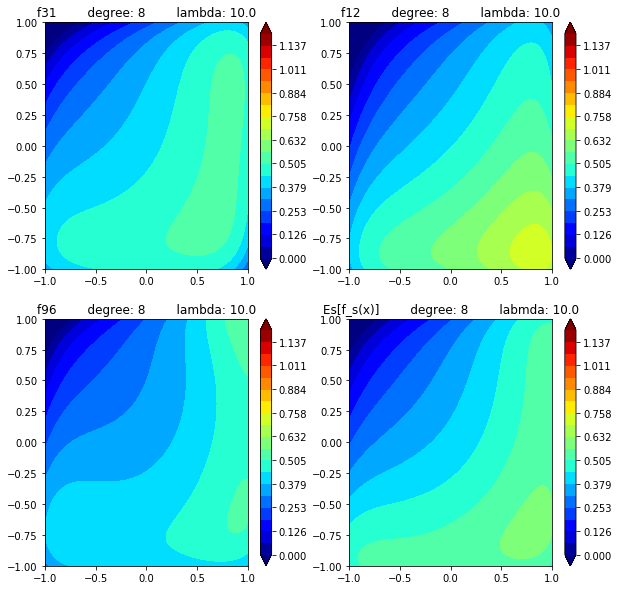

Bias = 0.05806525862642795
Variance = 0.002479436621206493
MSE = 0.06054469524763445
Degree= 8 lambda= 1000.0


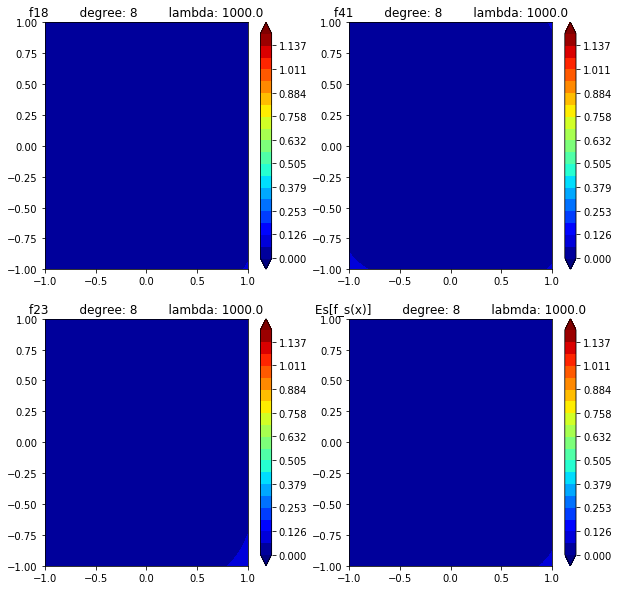

Bias = 0.30152623628424674
Variance = 1.3936665231640147e-05
MSE = 0.3015401729494784
Degree= 16 lambda= 1e-07


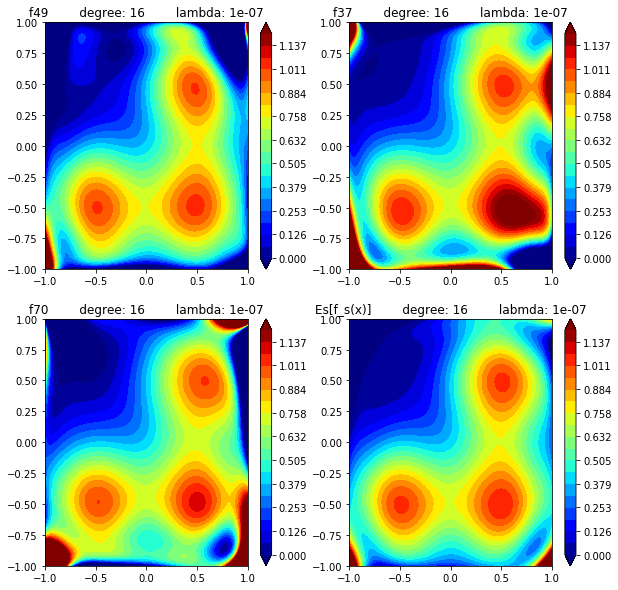

Bias = 0.029437067366353768
Variance = 0.4537865922395662
MSE = 0.48322365960591995
Degree= 16 lambda= 1e-05


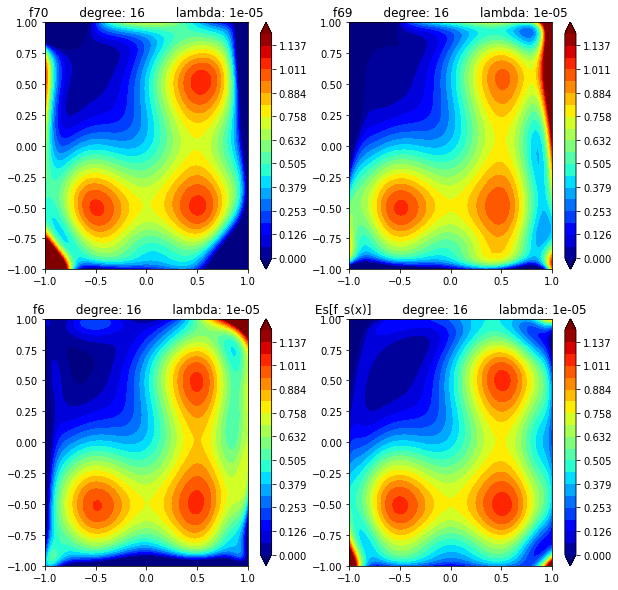

Bias = 0.01369768918595835
Variance = 0.1673951604636378
MSE = 0.18109284964959627
Degree= 16 lambda= 0.001


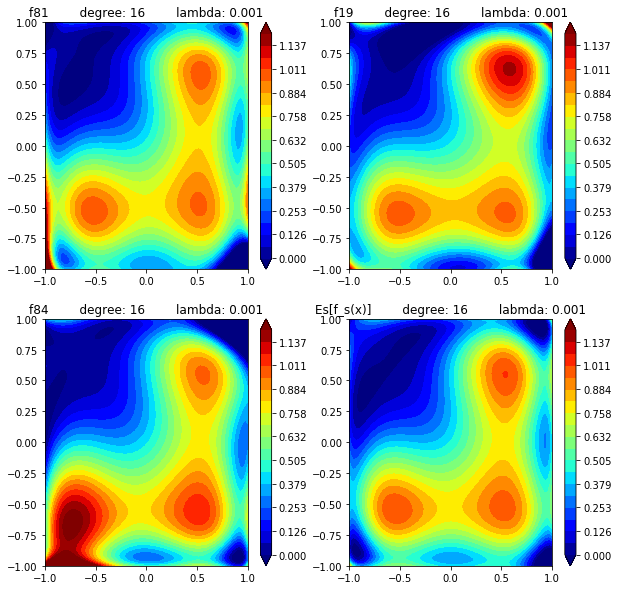

Bias = 0.007033165269436242
Variance = 0.06380091918262776
MSE = 0.07083408445206399
Degree= 16 lambda= 0.1


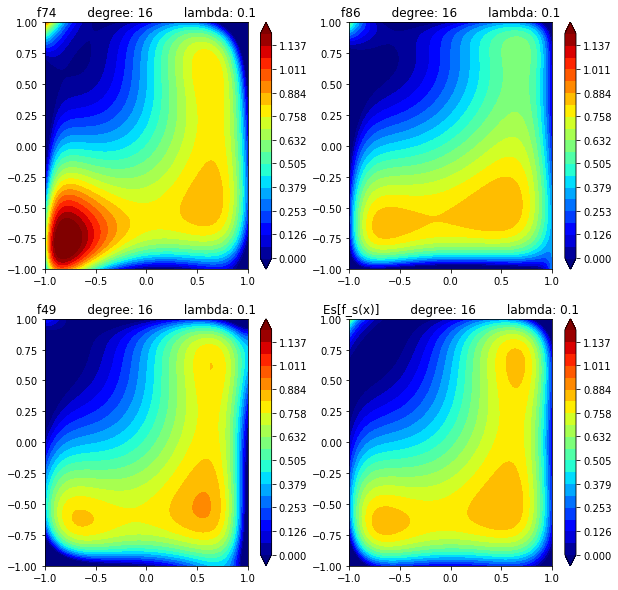

Bias = 0.012203719643973513
Variance = 0.011929243160900799
MSE = 0.024132962804874317
Degree= 16 lambda= 10.0


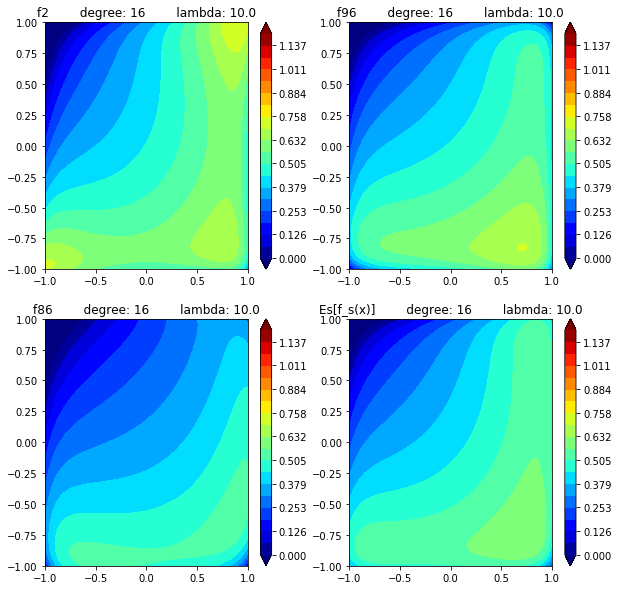

Bias = 0.05183056679892872
Variance = 0.0028609934069141426
MSE = 0.05469156020584286
Degree= 16 lambda= 1000.0


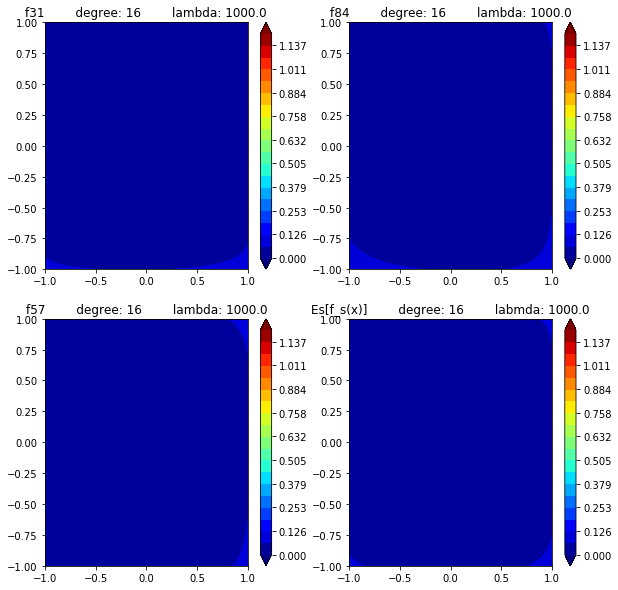

Bias = 0.30120087079088376
Variance = 1.918817145032809e-05
MSE = 0.30122005896233395


In [8]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    d_dash = int((degree+1)*(degree+2)/2)
    x1_vals = np.zeros((len(X_test), degree+1))
    x2_vals = np.zeros_like(x1_vals)
    for i in range(degree+1):
        x1_vals[:,i] = X_test[:,0]**i
        x2_vals[:,i] = X_test[:,1]**i
    phi = np.ones((X_test.shape[0],1))
    for d2 in range(degree+1):
        for d1 in range(degree+1):
            if (d1+d2)<=degree and d1+d2!=0:
                phi = np.hstack((phi, (x1_vals[:,d1]*x2_vals[:,d2]).reshape(-1,1)))

    return phi@wt_vector
        
def visualise_polynomial_2d(wt_vector, degree, title="", subplot_number=1):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X_ = X.copy().reshape(-1,1)
    Y_ = Y.copy().reshape(-1,1)
    X_test = np.hstack((X_,Y_))
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree=degree).reshape(100,100)
    
    plt.subplot(2,2,subplot_number)
    plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """

    d_dash = int((degree+1)*(degree+2)/2)
    x1_vals = np.zeros((len(X_train), degree+1))
    x2_vals = np.zeros_like(x1_vals)
    for i in range(degree+1):
        x1_vals[:,i] = X_train[:,0]**i
        x2_vals[:,i] = X_train[:,1]**i
    phi = np.ones((X_train.shape[0],1))
    for d2 in range(degree+1):
        for d1 in range(degree+1):
            if (d1+d2)<=degree and d1+d2!=0:
                phi = np.hstack((phi, (x1_vals[:,d1]*x2_vals[:,d2]).reshape(-1,1)))
    w = np.linalg.inv((phi.T@phi+reg_param*np.eye(d_dash)))@(phi.T)@Y_train
    return w
    
    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    d_dash = int((degree+1)*(degree+2)/2)
    a = np.array([0.5, 0.5]).reshape(1,-1)
    b = -1*a.copy()
    c = np.array([0.5, -0.5]).reshape(1,-1)
    number_of_runs=100
    w_vals = np.zeros((d_dash, number_of_runs))
    from numpy import exp
    
    for step in range(number_of_runs):
        x = np.random.uniform(low=[-1,-1], high=[1,1], size=(num_training_samples,2))
        y = exp(-4*(np.sum((x-a)**2, axis=1))) + exp(-4*(np.sum((x-b)**2, axis=1))) + exp(-4*(np.sum((x-c)**2, axis=1)))
        w = polynomial_regression_ridge_train(x,y,degree=degree, reg_param=reg_param)
        w_vals[:,step] = w
    
    w_mean = np.mean(w_vals, axis=1)
    x_axis = np.linspace(-1,1, number_of_runs)
    y_axis = np.linspace(-1,1, number_of_runs)
    A,B = np.meshgrid(x_axis,y_axis)
    A = A.reshape(-1,1)
    B = B.reshape(-1,1)
    X_test = np.hstack((A,B))
    Y_test = exp(-4*(np.sum((X_test-a)**2, axis=1))) + exp(-4*(np.sum((X_test-b)**2, axis=1))) + exp(-4*(np.sum((X_test-c)**2, axis=1)))
    y_mean = polynomial_regression_ridge_pred(X_test, w_mean, degree=degree)
    bias = np.mean((y_mean-Y_test)**2)
    y_hat_vals = np.zeros((number_of_runs*number_of_runs, number_of_runs))
    for step in range(number_of_runs):
        y_hat_vals[:,step] = polynomial_regression_ridge_pred(X_test, w_vals[:,step], degree=degree)
    
    random_samples = np.random.randint(low=1, high=number_of_runs, size=3)-1
    for i in range(3):
        temp = "f{}        degree: {}        lambda: {}".format(random_samples[i], degree, reg_param)
        visualise_polynomial_2d(w_vals[:,random_samples[i]], degree, title=temp, subplot_number=i+1)
    temp_ = "Es[f_s(x)]        degree: {}        labmda: {}".format(degree, reg_param)
    visualise_polynomial_2d(w_mean, degree, title=temp_, subplot_number=4)
    plt.show()
    
    y_mean = y_mean.reshape(-1,1)
    variance = np.mean((y_hat_vals-y_mean)**2)
    Y_test = Y_test.reshape(-1,1)
    MSE = np.mean((y_hat_vals-Y_test)**2)
    
    return bias, variance, MSE 


degrees = [1,2,4,8,16]
reg_params = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
bias_matrix = np.zeros((len(degrees), len(reg_params)))
variance_matrix = np.zeros_like(bias_matrix)
for d in range(len(degrees)):
    for r in range(len(reg_params)):
        print('================================')
        print('Degree= '+str(degrees[d])+' lambda= '+str(reg_params[r]))
        plt.figure(figsize=(10,10))
        b,v,e = compute_BV_error_sample_plot(degrees[d], reg_params[r])
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        bias_matrix[d,r] = b
        variance_matrix[d,r] = v

In [9]:
# Uncomment the lines below the print the tables
# NOTE: The tables above are for a particular set of realizations of X and corresponding y.
# The printed tables hence may not match exactly to the values in the markdown cells, especially the bias values of higher degree polynomials

# from tabulate import tabulate
# degs = ["Degree 1","Degree 2","Degree 4","Degree 8","Degree 16"]
# lambdas = ["lambda -->", '1e-7', '1e-5', '1e-3', '1e-1', '1e1', '1e3']
# bias_matrix_ = list(bias_matrix.copy())
# variance_matrix_ = list(variance_matrix.copy())
# for i in range(len(bias_matrix_)):
#     variance_matrix_[i] = list(variance_matrix_[i])
#     bias_matrix_[i] = list(bias_matrix_[i])
#     bias_matrix_[i].insert(0,degs[i])
#     variance_matrix_[i].insert(0,degs[i])
# print("\t\t\t\t\tBIAS\t\t\t\t\t")
# print(tabulate(bias_matrix_, headers=lambdas, tablefmt='fancy_grid'))
# print("\t\t\t\t\tVARIANCE\t\t\t\t\t")
# print(tabulate(variance_matrix_, headers=lambdas, tablefmt='fancy_grid'))


<!-- ** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

 -->
<table>
<tr><th><center><b>Bias</b></center></th><th><center><b>Variance</b></center></th></tr>
<tr><td>
<!-- <tr><td><table></table> -->
<!-- <center><b>Bias</b></center> -->

|     λ     	|    1e-7   	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1    	|    1e3   	|
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|
|  Degree 1 	| 0.0552881 	|  0.055326  	|  0.0552466 	|  0.0551282 	| 0.0653387 	| 0.307394 	|
|  Degree 2 	| 0.0347913 	|  0.0347684 	|  0.0349889 	|  0.0347717 	|  0.061813 	| 0.303788 	|
|  Degree 4 	| 0.0090454 	| 0.00842842 	| 0.00795781 	| 0.00903706 	| 0.0607206 	| 0.302221 	|
|  Degree 8 	| 0.0118671 	| 0.00563409 	| 0.00436715 	| 0.00991963 	|  0.055959 	| 0.301355 	|
| Degree 16 	| 0.0261447 	| 0.00960771 	| 0.00706348 	|  0.0118831 	| 0.0528419 	| 0.301504 	|

</td><td>

<!-- <center><b>Variance</b></center> -->

|     λ     	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|     1e1    	|     1e3     	|
|:---------:	|:----------:	|:----------:	|:----------:	|:----------:	|:----------:	|:-----------:	|
|  Degree 1 	| 0.00383736 	| 0.00370129 	| 0.00414507 	| 0.00378909 	| 0.00156153 	| 6.62458e-06 	|
|  Degree 2 	| 0.00556269 	| 0.00535765 	| 0.00590162 	| 0.00479609 	| 0.00181438 	| 7.18631e-06 	|
|  Degree 4 	| 0.00941279 	| 0.00907775 	|  0.0182262 	| 0.00434184 	| 0.00223916 	|  1.0892e-05 	|
|  Degree 8 	|  0.222646  	|  0.0474733 	|  0.0197494 	| 0.00637817 	| 0.00264037 	| 1.27672e-05 	|
| Degree 16 	|  0.419257  	|  0.164875  	|  0.0552019 	|  0.0114133 	| 0.00283817 	| 1.95195e-05 	|
</td></tr> </table>

<br />


## Observations
- The bias in general decreases as the degree of polynomial is increased. However, on increasing the degree too much, the bias term increases again as we do not have enough data points to generalize to polynomials of degree 8 or 16. 
- The variance for a fixed λ almost always increases with the degree of the polynomial. 
- When λ is set to 1000 the bias values are exactly the same for all degrees as it dominates anything else. We have a polynomial which is almost always zero.
- For polynomials of higher degree, the variance decreases as we increase λ irrespective of its value. For polynomials of lower degree, this is the case when the values of λ are relatively high. For lower λ values, the trends are less clear.
- For polynomials of lower degree, almost always the bias increases as we increase λ irrespective of its value. For polynomials of higher degree, this is the case when the values of λ are relatively high. For lower λ values, the trends are less clear. 


# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




In [10]:
# Cell type : CodeWrite 
degrees = [1,2,4,8,16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
dataset_sizes = [50,100,200,1000]
data4_1 = np.load('dataset4_1.npz')
X_train, Y_train, X_test, Y_test = data4_1['arr_0'],data4_1['arr_1'],data4_1['arr_2'],data4_1['arr_3']
MSE_train = np.zeros((len(dataset_sizes), len(degrees), len(reg_params)))
MSE_test = np.zeros_like(MSE_train)
best_ws = [0,0,0,0]
best_params = [0,0,0,0]
for d in range(len(dataset_sizes)):
    best_mse = np.inf
    for i in range(len(degrees)):
        for j in range(len(reg_params)):
            train_data_x = X_train[:dataset_sizes[d]]
            train_data_y = Y_train[:dataset_sizes[d]]
            w = polynomial_regression_ridge_train(train_data_x, train_data_y, degree=degrees[i], reg_param=reg_params[j])
            y_pred_test = polynomial_regression_ridge_pred(X_test, w, degree=degrees[i])
            y_pred_train = polynomial_regression_ridge_pred(train_data_x, w, degree=degrees[i])
            mse_train = np.mean((train_data_y-y_pred_train)**2)
            mse_test = np.mean((Y_test-y_pred_test)**2)
            if mse_test<=best_mse:
                best_ws[d] = w
                best_mse = mse_test
            MSE_train[d, i, j] = mse_train
            MSE_test[d, i, j] = mse_test

for i in range(len(best_params)):
    best_params[i] = np.where(MSE_test[i,:,:] == np.min(MSE_test[i,:,:]))

# Uncomment the lines below to print the tables    


# from tabulate import tabulate
# rows = ["Degree 1","Degree 2","Degree 4","Degree 8","Degree 16"]
# cols = ["lambda -->","1e-9","1e-7","1e-5","1e-3","1e-1","1e1"]
# for j in range(len(dataset_sizes)):
#     print("=========================================================================================")
#     print(f"Dataset Size:\t{dataset_sizes[j]}")
#     data = list(MSE_train[j])
#     data_ = list(MSE_test[j])
#     best_fit_train = np.where(data == np.min(data))
#     best_fit_test = np.where(data_ == np.min(data_))
#     for i in range(len(data)):
#         data[i] = list(data[i])
#         data[i].insert(0, rows[i])
#         data_[i] = list(data_[i])
#         data_[i].insert(0, rows[i])
#     print("\t\t\t******\t   MSE train\t******\t\t\t")
#     print(tabulate(data, headers=cols, tablefmt='fancy_grid'))
#     print("\t\t\t******\t   MSE test\t******\t\t\t")
#     print(tabulate(data_, headers=cols, tablefmt='fancy_grid'))
#     print(f"MSE_test lowest for \tdegree: {degrees[int(best_fit_test[0])]}\tlambda: {reg_params[int(best_fit_test[1])]}")
#     print(f"MSE_train lowest for \tdegree: {degrees[int(best_fit_train[0])]}\tlambda: {reg_params[int(best_fit_train[1])]}")


<center><b>Dataset Size: 50</b></center>
<table>
<tr><th><center><b>MSE Train</b></center></th><th><center><b>MSE Test</b></center></th></tr>
<tr><td>

|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|
| Degree 1   | 0.250383    | 0.250383    | 0.250383   | 0.250383  | 0.250384  | 0.255898 |
| Degree 2   | 0.134112    | 0.134112    | 0.134112   | 0.134112  | 0.134213  | 0.197483 |
| Degree 4   | 0.102018    | 0.102018    | 0.102018   | 0.102019  | 0.104107  | 0.180638 |
| Degree 8   | 0.000132733 | 0.000199157 | 0.0107658  | 0.0417213 | 0.081991  | 0.1632   |
| Degree 16  | <b>1.95684e-08</b> | 9.367e-06   | 0.00131769 | 0.0311131 | 0.0700207 | 0.150013 |

</td><td>


|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:----------:	|:----------:	|:----------:	|:----------:	|:----------:	|:-----------:	|
|Degree  1   |   0.301267 |   0.301267 |  0.301267 | 0.301262 | 0.300838 | 0.278351 |
| Degree  2   |   0.1579   |   0.1579   |  0.1579   | 0.157886 | <b>0.156735</b> | 0.208224 |
| Degree  4   |   0.157334 |   0.157334 |  0.157333 | 0.157243 | 0.161826 | 0.196569 |
| Degree  8   | 237.69     | 172.502    | 18.5943   | 0.990251 | 0.165156 | 0.193919 |
| Degree  16  | 250.521    | 232.025    | 66.6977   | 2.33731  | 0.203961 | 0.196057 |
    
 </td></tr> </table>

<br />


<!-- 
MSE Test lowest for 	degree: 2	λ: 0.1
MSE Train lowest for 	degree: 16	λ: 1e-09 -->
<center><b>Dataset Size: 100</b></center>
<table>
<tr><th><center><b>MSE Train</b></center></th><th><center><b>MSE Test</b></center></th></tr>
<tr><td>

|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|
| Degree  1   | 0.258091    | 0.258091    | 0.258091   | 0.258091  | 0.258091  | 0.25874  |
| Degree  2   | 0.130951    | 0.130951    | 0.130951   | 0.130951  | 0.130966  | 0.164968 |
| Degree  4   | 0.113027    | 0.113027    | 0.113027   | 0.113027  | 0.113651  | 0.152373 |
| Degree  8   | 0.0415879   | 0.0415879   | 0.04168    | 0.0580085 | 0.0929016 | 0.144886 |
| Degree  16  | <b>7.73501e-06</b> | 0.000483967 | 0.00754402 | 0.0417292 | 0.0836969 | 0.139544 |

</td><td>


|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:----------:	|:----------:	|:----------:	|:----------:	|:----------:	|:-----------:	|
| Degree 1     |  0.273149 |  0.273149 |  0.273149 | 0.273148 | 0.273083 | 0.268622 |
| Degree 2     |  0.15321  |  0.15321  |  0.15321  | 0.153207 | 0.152916 | 0.175709 |
| Degree 4     |  <b>0.142776</b> |  0.142776 |  0.142776 | 0.142808 | 0.14602  | 0.16898  |
| Degree 8     |  0.712916 |  0.71132  |  0.580759 | 0.203638 | 0.162628 | 0.171168 |
| Degree 16    | 54.081    | 11.7704   | 23.4166   | 0.417849 | 0.188359 | 0.17416  |
    
    
 </td></tr> </table>
 
 <br />
 
 <center><b>Dataset Size: 200</b></center>
<table>
<tr><th><center><b>MSE Train</b></center></th><th><center><b>MSE Test</b></center></th></tr>
<tr><td>

|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|
| Degree 1     | 0.246535    | 0.246535   | 0.246535  | 0.246535  | 0.246535  | 0.246641 |
| Degree 2     | 0.133665    | 0.133665   | 0.133665  | 0.133665  | 0.133669  | 0.147549 |
| Degree 4     | 0.113338    | 0.113338   | 0.113338  | 0.113338  | 0.11359   | 0.144444 |
| Degree 8     | 0.0617373   | 0.0617373  | 0.0617381 | 0.0639497 | 0.0956872 | 0.141193 |
| Degree 16    | <b>2.88166e-05</b> | 0.00108543 | 0.0113256 | 0.0444633 | 0.0834996 | 0.133763 |

</td><td>


|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:----------:	|:----------:	|:----------:	|:----------:	|:----------:	|:-----------:	|
| Degree 1     | 0.267663  | 0.267663  | 0.267663 | 0.267663  | 0.267646 | 0.266225 |
| Degree 2     | 0.145781  | 0.145781  | 0.145781 | 0.14578   | 0.145754 | 0.158682 |
| Degree 4     | 0.131171  | 0.131171  | 0.131171 | 0.131164  | 0.130831 | 0.157085 |
| Degree 8     | 0.137363  | 0.137359  | 0.136982 | 0.118183  | 0.113965 | 0.156451 |
| Degree 16    | <b>0.0371495</b> | 0.0837102 | 0.170807 | 0.0869037 | 0.111214 | 0.152244 |
    
 </td></tr> </table>
 
 <br />


<center><b>Dataset Size: 1000</b></center>
<table>
<tr><th><center><b>MSE Train</b></center></th><th><center><b>MSE Test</b></center></th></tr>
<tr><td>

|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|
| Degree 1     | 0.240728    | 0.240728    | 0.240728   | 0.240728  | 0.240728  | 0.240729 |
| Degree 2     | 0.138824    | 0.138824    | 0.138824   | 0.138824  | 0.138824  | 0.139718 |
| Degree 4     | 0.125017    | 0.125017    | 0.125017   | 0.125017  | 0.125025  | 0.134172 |
| Degree 8     | 0.0767429   | 0.0767429   | 0.0767429  | 0.0768462 | 0.094838  | 0.128438 |
| Degree 16    | <b>2.54868e-05</b> | 0.000445127 | 0.00653349 | 0.0384153 | 0.0849926 | 0.121687 |
    
 
</td><td>


|     λ     	|    1e-9   	|    1e-7    	|    1e-5    	|    1e-3    	|    1e-1    	|    1e1   	|
|:---------:	|:----------:	|:----------:	|:----------:	|:----------:	|:----------:	|:-----------:	|
| Degree 1     | 0.262535   | 0.262535   | 0.262535  | 0.262535  | 0.262535  | 0.26253  |
| Degree 2     | 0.142429   | 0.142429   | 0.142429  | 0.142429  | 0.142442  | 0.144519 |
| Degree 4     | 0.12708    | 0.12708    | 0.12708   | 0.127081  | 0.127242  | 0.140937 |
| Degree 8     | 0.0848127  | 0.0848126  | 0.0848003 | 0.0839132 | 0.0978227 | 0.134989 |
| Degree 16    | <b>0.00119773</b> | 0.00149006 | 0.0109572 | 0.0496581 | 0.0907374 | 0.127821 |
    
 </td></tr> </table>
 
 <br />
 
 
 | Dataset Size 	| Optimal Degree 	| Optimal λ  	|
|:------------:	|:--------------:	|:----------:	|
|      50      	|        2       	|     0.1    	|
|      100     	|        4       	|    1e-9    	|
|      200     	|       16       	|    1e-9    	|
|     1000     	|       16       	|    1e-9    	|




## Observations
- The optimal values of MSE train and MSE test are marked in bold.
- The MSE on the trainset is always the best for λ=1e-9 and polynomial of degree 16. This is because a higher degree polynomial with low regularization will always fit the training data better.    
- Although the training MSE is very low for polynomials of higher degree when the dataset size is small, the test MSE is very high showing the model has just captured all the noise and has not learnt any useful generalization.
- Lower degree polynomials with high enough λ do better on a smaller dataset showing they generalize better.
- When we have higher number of data samples, we can fit higher degree polynomials which also generalize on the dataset.










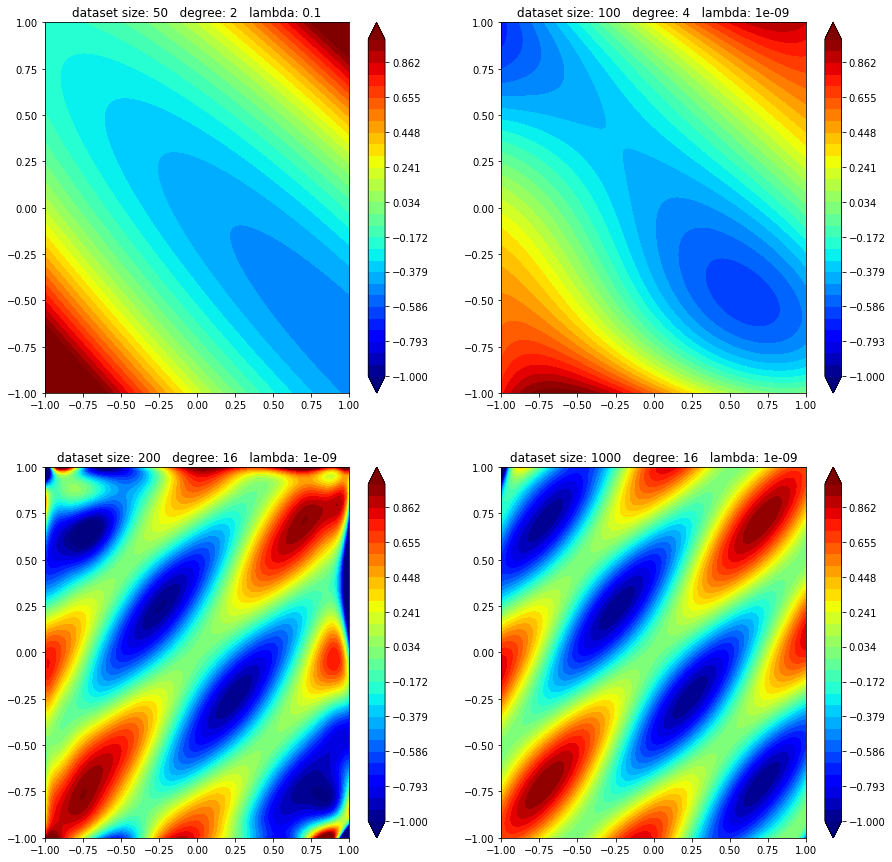

In [11]:
d_dash_to_d = {3:1, 6:2, 15:4, 45:8, 153:16}
X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
X_ = X.copy().reshape(-1,1)
Y_ = Y.copy().reshape(-1,1)
X_test = np.hstack((X_,Y_))
plt.figure(figsize=(15,15))
for i in range(len(best_ws)):
    wt_vector = best_ws[i]
    d_dash = len(wt_vector)
    degree = d_dash_to_d[d_dash]
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree=degree).reshape(100,100)
    title = "dataset size: {}   degree: {}   lambda: {}".format(dataset_sizes[i], degree, reg_params[int(best_params[i][1])])
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,Z,levels=np.linspace(-1,1., 30), cmap='jet', extend='both')
    plt.title(title)
    plt.colorbar()
plt.show()